In [67]:
import os
import settings
import pandas as pd
import numpy as np
import operator
import graphviz
from sklearn.tree import export_graphviz

from sklearn.tree import DecisionTreeRegressor

def read_data():
    df = pd.read_excel(os.path.join(settings.PROCESSED_DIR, "all_with_liwc_segmented.xls"), encoding="ISO-8859-1")
    return df

def sort_important_features(df):
    dt = DecisionTreeRegressor()
    predictors = df.columns.tolist()
    predictors = [p for p in predictors if p not in settings.NON_PREDICTORS]
    model = dt.fit(df[predictors], df[settings.TARGET])
    predictions = dt.predict(df[predictors])
    results = {name: score for name, score in zip(predictors, dt.feature_importances_)}
    sorted_results = sorted(results.items(), key=operator.itemgetter(1), reverse=True)
    for feat, importance in sorted_results:
        print('feature: {f}, importance: {i}'.format(f=feat, i=importance))
    accuracy = dt.score(df[predictors], df[settings.TARGET])
    print("Accuracy: {}".format(accuracy))
    return model

In [68]:
df = read_data()

In [72]:
model = sort_important_features(df)

feature: laughter, importance: 0.14969048410166266
feature: filler, importance: 0.030459987550782875
feature: risk, importance: 0.029216127689992703
feature: prep, importance: 0.02593075270995466
feature: posemo_2q, importance: 0.022024211183661428
feature: health, importance: 0.02166595268530606
feature: leisure, importance: 0.018644410609200447
feature: cogproc, importance: 0.01757507121202631
feature: friend, importance: 0.01744003345380189
feature: posemo_3q, importance: 0.016923757973553576
feature: Sixltr, importance: 0.015864103410690705
feature: Moral, importance: 0.015622833736556438
feature: WPS, importance: 0.014685813910427784
feature: AuthorityVirtue, importance: 0.014277628152554504
feature: ppron, importance: 0.013448327722837992
feature: assent, importance: 0.01225552606173287
feature: drives, importance: 0.01210997970582114
feature: function, importance: 0.012060051315980324
feature: family, importance: 0.011484738838943846
feature: MoralityGeneral, importance: 0.01117

In [70]:
def print_tree(model):
    predictors = df.columns.tolist()
    features = [p for p in predictors if p not in settings.NON_PREDICTORS]
    data = export_graphviz(model, out_file=None, feature_names=features)
    graph = graphviz.Source(data)
    graph.render(view=True)

In [71]:
print_tree(model)

## Random Forest

In [79]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

def sort_important_features(df):
    rf = RandomForestRegressor()
    predictors = df.columns.tolist()
    predictors = [p for p in predictors if p not in settings.NON_PREDICTORS]
    model = rf.fit(df[predictors], df[settings.TARGET])
    predictions = rf.predict(df[predictors])
    importances = rf.feature_importances_
    
    results = {name: score for name, score in zip(predictors, importances)}
    sorted_results = sorted(results.items(), key=operator.itemgetter(1), reverse=True)
    for feat, importance in sorted_results:
        print('feature: {f}, importance: {i}'.format(f=feat, i=importance))
    accuracy = rf.score(df[predictors], df[settings.TARGET])
    print("Accuracy: {}".format(accuracy))
    names = [k[0] for k in sorted_results]
    return model, importances, names

def plot_feature_importances(df, importances, names):
    reversed_names = names[::-1]
    predictors = df.columns.tolist()
    predictors = [p for p in predictors if p not in settings.NON_PREDICTORS]
    features = predictors
    indices = np.argsort(importances)
    predictors = np.array(predictors)
    
    
    plt.figure(figsize=(30,30))
    matplotlib.rcParams.update({'font.size': 16})
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')

    plt.yticks(range(len(indices)),reversed_names)
    plt.xlabel('Relative Importance')
    plt.show()

In [80]:
rf, importances, names = sort_important_features(df)

feature: laughter, importance: 0.12033666608753454
feature: filler, importance: 0.030984491711715696
feature: assent, importance: 0.030857394536068443
feature: tentat, importance: 0.027934437421863294
feature: i, importance: 0.024499120032204225
feature: WPS, importance: 0.020364791857895092
feature: negate, importance: 0.014707718790728113
feature: risk, importance: 0.01393340358025473
feature: ingest, importance: 0.013265584664841849
feature: feel, importance: 0.012962645080723834
feature: ipron, importance: 0.012640941999170255
feature: achieve, importance: 0.012106788304787924
feature: insight, importance: 0.01160314330877917
feature: article, importance: 0.011588535990431175
feature: certain, importance: 0.011131520160684761
feature: they, importance: 0.010572915424585386
feature: conj, importance: 0.010468995461614854
feature: money, importance: 0.010430504218187791
feature: hear, importance: 0.010019876821607316
feature: leisure, importance: 0.009983655710236251
feature: space, 

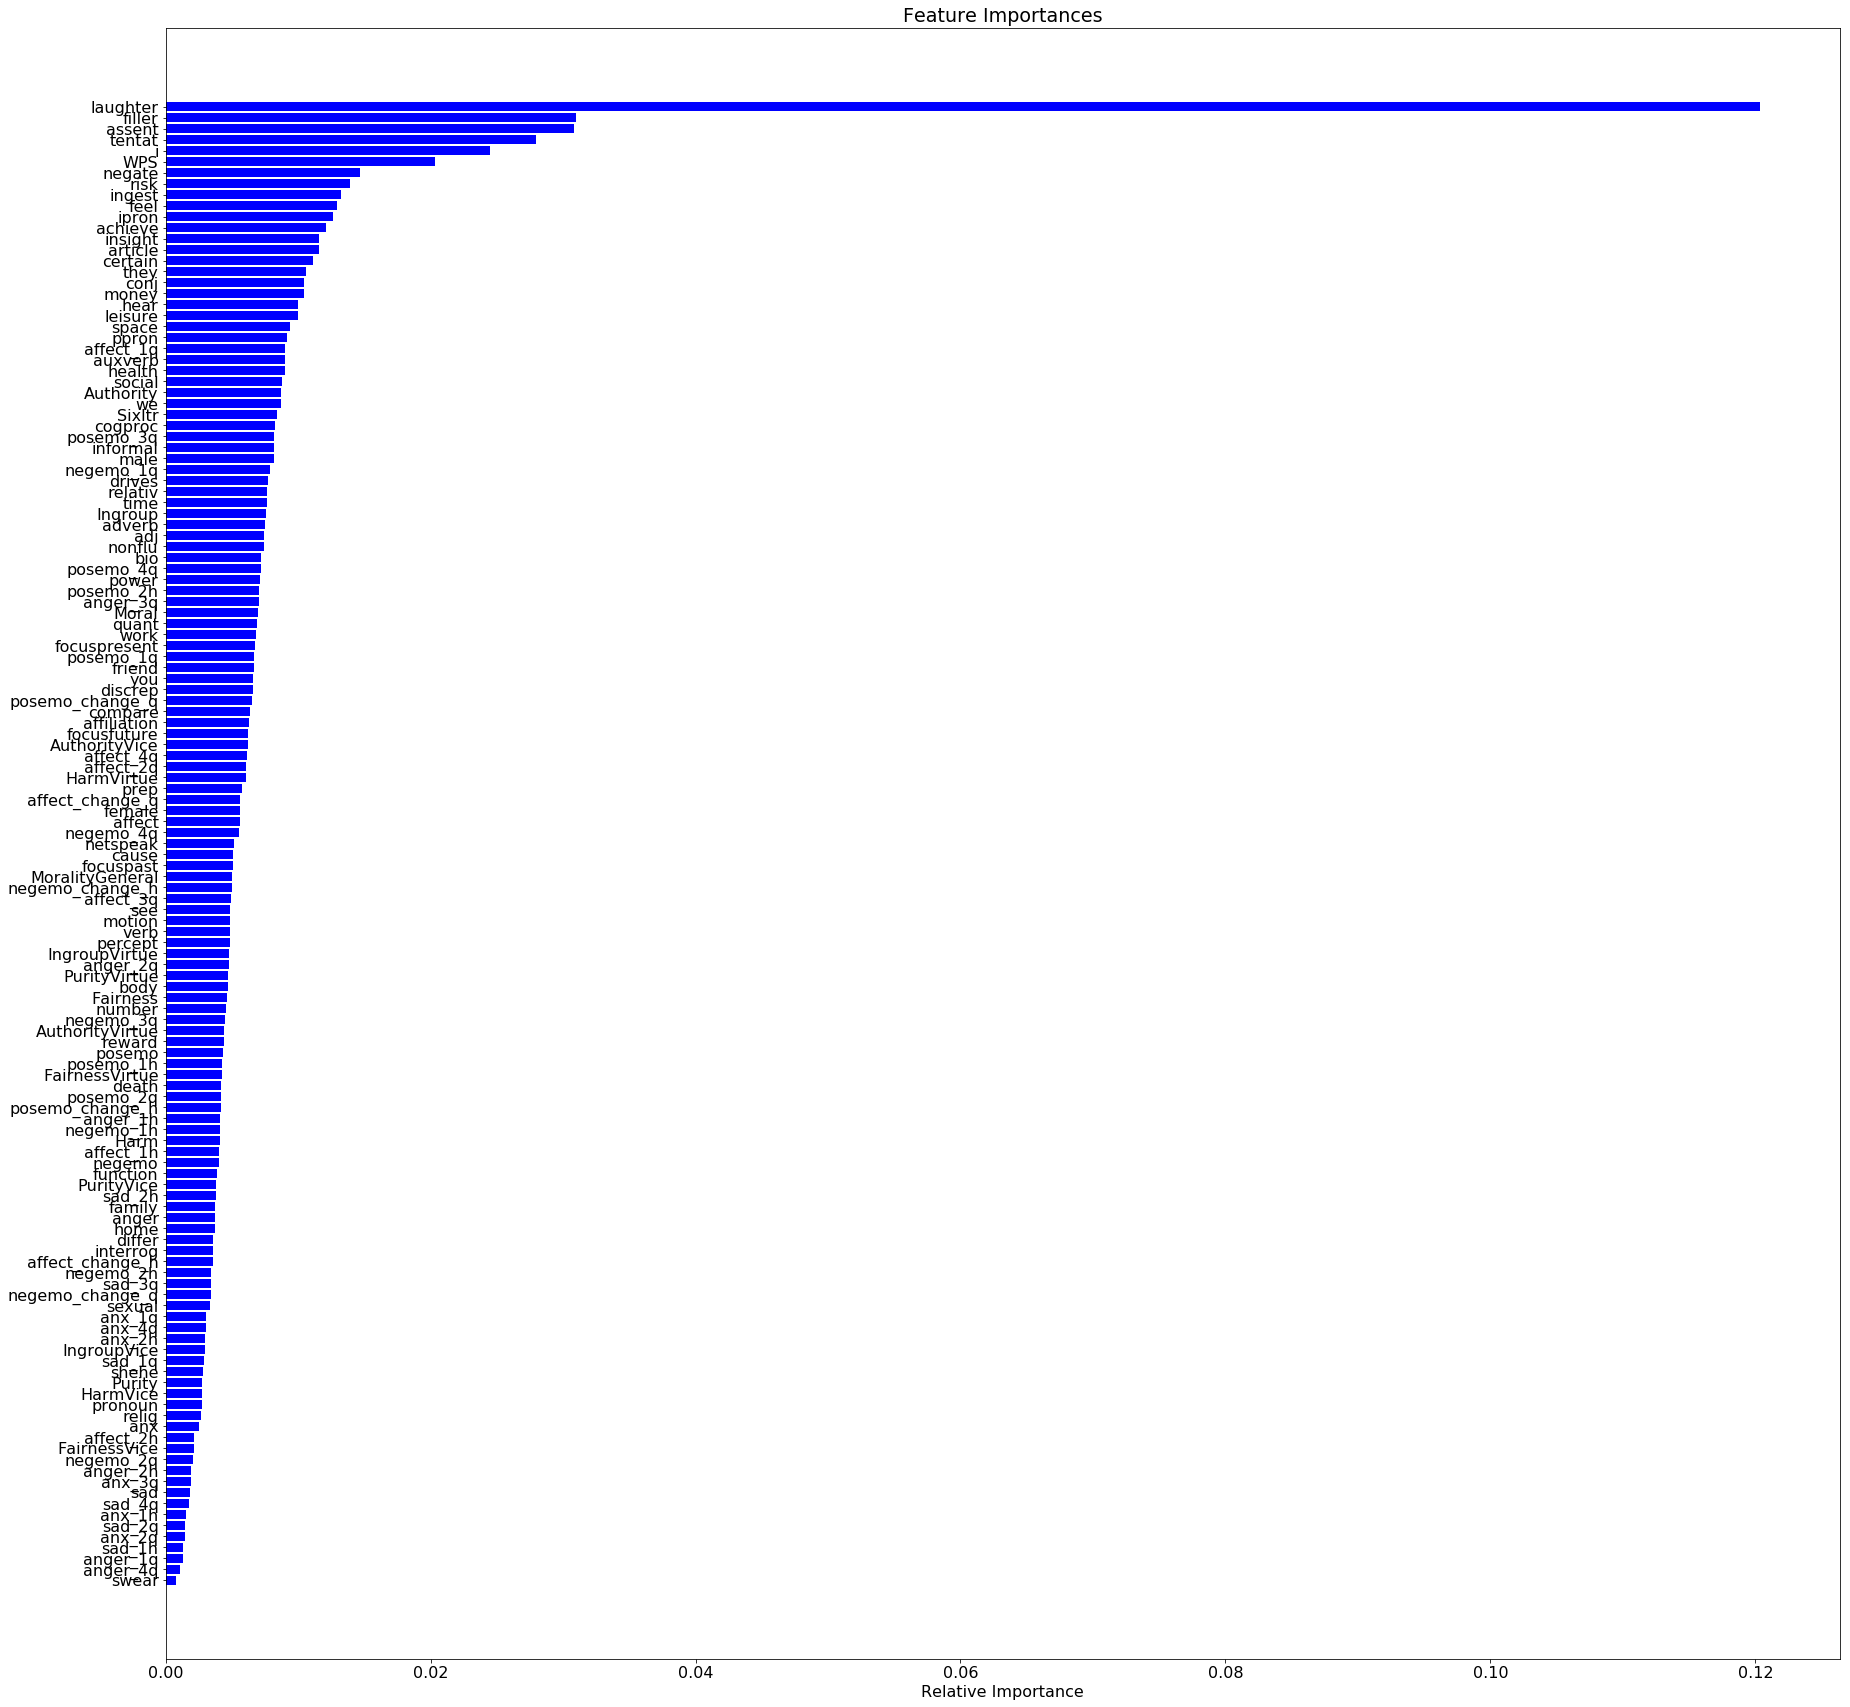

In [81]:
plot_feature_importances(df, importances, names)

## Linear Regression

In [66]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [104]:
def create_summary(df):
    lr = LinearRegression()
    predictors = df.columns.tolist()
    predictors = ['assent', 'i', 'insight', 'filler', 'Fairness', 'posemo', 'negate', 'achieve','risk']
    lr.fit(df[predictors], df['applause'])

    X = df[predictors]
    X2 = sm.add_constant(X)
    est = sm.OLS(df['applause'], X2)
    est2 = est.fit()
    print(est2.summary())

In [105]:
create_summary(df)

                            OLS Regression Results                            
Dep. Variable:               applause   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     31.72
Date:                Fri, 12 Jan 2018   Prob (F-statistic):           5.62e-53
Time:                        18:22:18   Log-Likelihood:                -4839.2
No. Observations:                2406   AIC:                             9698.
Df Residuals:                    2396   BIC:                             9756.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3675      0.159      8.608      0.0

In [64]:
def create_summary(df):
    lr = LinearRegression()
    predictors = df.columns.tolist()
    predictors = ['affect_change_h']
    lr.fit(df[predictors], df['applause'])

    X = df[predictors]
    X2 = sm.add_constant(X)
    est = sm.OLS(df['applause'], X2)
    est2 = est.fit()
    print(est2.summary())

In [65]:
create_summary(df)

                            OLS Regression Results                            
Dep. Variable:               applause   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     4.876
Date:                Thu, 11 Jan 2018   Prob (F-statistic):             0.0273
Time:                        18:41:22   Log-Likelihood:                -4972.2
No. Observations:                2406   AIC:                             9948.
Df Residuals:                    2404   BIC:                             9960.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               2.0525      0.041     